In [1]:
import pandas as pd

In [2]:
sample_data = {
    "day": ["2/3/2018", "4/5/2018", "6/7/2019", "8/9/2019", "10/11/2020", "12/13/2020", "1/2/2021", "1/3/2021"],
    "price": [10, 12, 20, 34, 32, 40, 34, 42],
    "vol": [12, 12, 25, 40, 56, 12, 68, 40],
    "color": ["red", "yellow", "green", "blue", "orange", "magenta", "cyan", "violet"],
}
df = pd.DataFrame(sample_data)

In [3]:
# Or: df[:], df.head()
df

,day,price,vol,color
0,2/3/2018,10,12,red
1,4/5/2018,12,12,yellow
2,6/7/2019,20,25,green
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
5,12/13/2020,40,12,magenta
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [4]:
df.tail()

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
5,12/13/2020,40,12,magenta
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [5]:
# Shape
df.shape

(8, 4)

In [6]:
# Number of rows
len(df)

8

In [7]:
df.dtypes

day      object
price     int64
vol       int64
color    object
dtype: object

## Access

In [8]:
# Access a column
df.vol

0    12
1    12
2    25
3    40
4    56
5    12
6    68
7    40
Name: vol, dtype: int64

In [9]:
# Also
df['price']

0    10
1    12
2    20
3    34
4    32
5    40
6    34
7    42
Name: price, dtype: int64

In [10]:
# Access a row
df[2:3]

,day,price,vol,color
2,6/7/2019,20,25,green


In [11]:
# Also
df.iloc[2:3]

,day,price,vol,color
2,6/7/2019,20,25,green


In [12]:
# Access a cell by row, col index with .iat
df.iat[3, 1]

34

In [13]:
# Access a cell by row index and column name with .at
df.at[5, 'color']

'magenta'

In [14]:
df.loc[df['vol'] > 30]

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [15]:
df[df.vol > 30]

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [16]:
# Show columns from a list
df[["day", "color"]]

,day,color
0,2/3/2018,red
1,4/5/2018,yellow
2,6/7/2019,green
3,8/9/2019,blue
4,10/11/2020,orange
5,12/13/2020,magenta
6,1/2/2021,cyan
7,1/3/2021,violet


In [17]:
# Vector-style operations on a column
[2 * df.vol]

[0     24
 1     24
 2     50
 3     80
 4    112
 5     24
 6    136
 7     80
 Name: vol, dtype: int64]

In [18]:
# Query
df.query('vol > 30 and price > 32')

,day,price,vol,color
3,8/9/2019,34,40,blue
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [19]:
# Select a random row
df.sample()

,day,price,vol,color
7,1/3/2021,42,40,violet


In [20]:
# Select n random rows
df.sample(n=2)

,day,price,vol,color
3,8/9/2019,34,40,blue
2,6/7/2019,20,25,green


In [21]:
pd.melt(df)

,variable,value
0,day,2/3/2018
1,day,4/5/2018
2,day,6/7/2019
3,day,8/9/2019
4,day,10/11/2020
5,day,12/13/2020
6,day,1/2/2021
7,day,1/3/2021
8,price,10
9,price,12


## Summarization

In [22]:
df.describe()

,price,vol
count,8.00000,8.00000
mean,28.00000,33.12500
std,12.37509,21.51038
min,10.00000,12.00000
25%,18.00000,12.00000
50%,33.00000,32.50000
75%,35.50000,44.00000
max,42.00000,68.00000


In [23]:
# Max of a column
max(df.price)

42

In [24]:
# Or:
df.price.max()

42

In [25]:
# Mean of a column
df.vol.mean()

33.125

In [26]:
sum(df.vol)

265

In [27]:
# Calculate a running sum with .expanding
df.vol.expanding(1).sum()

0     12.0
1     24.0
2     49.0
3     89.0
4    145.0
5    157.0
6    225.0
7    265.0
Name: vol, dtype: float64

In [28]:
# Count a column by unique values
df.vol.value_counts()

vol
12    3
40    2
25    1
56    1
68    1
Name: count, dtype: int64

In [29]:
# Enforce boundary values with .clip
df.vol.clip(lower=15, upper=55)

0    15
1    15
2    25
3    40
4    55
5    15
6    55
7    40
Name: vol, dtype: int64

In [30]:
import random

df2 = pd.DataFrame({
    "state": ["CA", "CA", "NY", "WA", "CO", "FL", "CO", "NY", "CA", "NY", "IL", "WA", "IL", "NY", "MA", "MS", "TX", "CA", "WA", "CO"],
    "val": [random.randint(0, 100) for _ in range(20)]
})
df2.head()

,state,val
0,CA,46
1,CA,88
2,NY,11
3,WA,38
4,CO,73


In [31]:
# Count values by a column with .groupby
# Sort by a different column with .sort_values
df2.groupby(by="state").count().sort_values('val', ascending=False)

,val
state,
CA,4
NY,4
CO,3
WA,3
IL,2
FL,1
MA,1
MS,1
TX,1


In [32]:
# The number of unique values in a column
df2['state'].nunique()

9

In [33]:
# Cumulative sum of a column
df2.val.cumsum()

0      46
1     134
2     145
3     183
4     256
5     272
6     352
7     437
8     481
9     503
10    572
11    579
12    618
13    702
14    774
15    785
16    841
17    929
18    964
19    992
Name: val, dtype: int64

In [34]:
# Cumulative max of a column
df2.val.cummax()

0     46
1     88
2     88
3     88
4     88
5     88
6     88
7     88
8     88
9     88
10    88
11    88
12    88
13    88
14    88
15    88
16    88
17    88
18    88
19    88
Name: val, dtype: int64

In [35]:
# Cumulative product of a column
df2.val.cumprod()

0                      46
1                    4048
2                   44528
3                 1692064
4               123520672
5              1976330752
6            158106460160
7          13439049113600
8         591318160998400
9       13008999541964800
10     897620968395571200
11    6283346778768998400
12    5242851413766766592
13   -2322339012620845056
14   -1187712245314879488
15    5381909375245877248
16    6239019834416300032
17   -4368576782652145664
18   -5326234803148685312
19   -1560621898486775808
Name: val, dtype: int64

In [36]:
df3 = pd.DataFrame({
    "state": ["WA", "MI", "WA", "AK", "FL", "IL", "CA", "RI", "MI", "IL", "TX", "OR", "AL", "TX", "MS", "MA", "OK", "WA", "WA", "CO"],
    "val": [random.randint(0, 100) for _ in range(20)]
})
df3.head()

,state,val
0,WA,80
1,MI,80
2,WA,41
3,AK,84
4,FL,48


In [37]:
# Intersection - values of state in df2 that are also in df3 - .isin
df2[df2.state.isin(df3.state)].state

0     CA
1     CA
3     WA
4     CO
5     FL
6     CO
8     CA
10    IL
11    WA
12    IL
14    MA
15    MS
16    TX
17    CA
18    WA
19    CO
Name: state, dtype: object

## Modification

### Convert date strings to datetimes

In [38]:
type(df.at[0, "day"])

str

In [39]:
pd.to_datetime(df.at[0, "day"])

Timestamp('2018-02-03 00:00:00')

In [40]:
df["day"] = pd.to_datetime(df["day"])
df

,day,price,vol,color
0,2018-02-03,10,12,red
1,2018-04-05,12,12,yellow
2,2019-06-07,20,25,green
3,2019-08-09,34,40,blue
4,2020-10-11,32,56,orange
5,2020-12-13,40,12,magenta
6,2021-01-02,34,68,cyan
7,2021-01-03,42,40,violet


### Add a derived column

In [41]:
# Add a column that is the result of an operation performed on zero or more other columns.
df = df.assign(sales=df.price * df.vol)
df

,day,price,vol,color,sales
0,2018-02-03,10,12,red,120
1,2018-04-05,12,12,yellow,144
2,2019-06-07,20,25,green,500
3,2019-08-09,34,40,blue,1360
4,2020-10-11,32,56,orange,1792
5,2020-12-13,40,12,magenta,480
6,2021-01-02,34,68,cyan,2312
7,2021-01-03,42,40,violet,1680


In [42]:
def lighten(color):
    return f"light {color}"

# This doesn't work as expected since df.color is a series
print(f"type(df.color) = {type(df.color)}")
df.assign(light_color=lighten(df.color))

type(df.color) = <class 'pandas.core.series.Series'>


,day,price,vol,color,sales,light_color
0,2018-02-03,10,12,red,120,light 0 red\n1 yellow\n2 green...
1,2018-04-05,12,12,yellow,144,light 0 red\n1 yellow\n2 green...
2,2019-06-07,20,25,green,500,light 0 red\n1 yellow\n2 green...
3,2019-08-09,34,40,blue,1360,light 0 red\n1 yellow\n2 green...
4,2020-10-11,32,56,orange,1792,light 0 red\n1 yellow\n2 green...
5,2020-12-13,40,12,magenta,480,light 0 red\n1 yellow\n2 green...
6,2021-01-02,34,68,cyan,2312,light 0 red\n1 yellow\n2 green...
7,2021-01-03,42,40,violet,1680,light 0 red\n1 yellow\n2 green...


In [43]:
# Use .apply to apply the function to each item in the column series.
df.assign(light_color=df.color.apply(lighten))

,day,price,vol,color,sales,light_color
0,2018-02-03,10,12,red,120,light red
1,2018-04-05,12,12,yellow,144,light yellow
2,2019-06-07,20,25,green,500,light green
3,2019-08-09,34,40,blue,1360,light blue
4,2020-10-11,32,56,orange,1792,light orange
5,2020-12-13,40,12,magenta,480,light magenta
6,2021-01-02,34,68,cyan,2312,light cyan
7,2021-01-03,42,40,violet,1680,light violet


### Rename Columns

In [44]:
# Rename one or more columns
# Similar to assign, the dataframe is not modified. The return value must be captured to do the modification.
df = df.rename(columns = {"vol": "volume"})
df = df.rename(columns = {"volume": "vol"})

In [45]:
df

,day,price,vol,color,sales
0,2018-02-03,10,12,red,120
1,2018-04-05,12,12,yellow,144
2,2019-06-07,20,25,green,500
3,2019-08-09,34,40,blue,1360
4,2020-10-11,32,56,orange,1792
5,2020-12-13,40,12,magenta,480
6,2021-01-02,34,68,cyan,2312
7,2021-01-03,42,40,violet,1680


In [46]:
# Shift values with .shift
df.price, df.price.shift(2)

(0    10
 1    12
 2    20
 3    34
 4    32
 5    40
 6    34
 7    42
 Name: price, dtype: int64,
 0     NaN
 1     NaN
 2    10.0
 3    12.0
 4    20.0
 5    34.0
 6    32.0
 7    40.0
 Name: price, dtype: float64)

In [47]:
# Show the index
df.index

RangeIndex(start=0, stop=8, step=1)

In [48]:
# Set the index to the provided column
df.set_index("day", inplace=True)
df

,price,vol,color,sales
day,,,,
2018-02-03,10,12,red,120
2018-04-05,12,12,yellow,144
2019-06-07,20,25,green,500
2019-08-09,34,40,blue,1360
2020-10-11,32,56,orange,1792
2020-12-13,40,12,magenta,480
2021-01-02,34,68,cyan,2312
2021-01-03,42,40,violet,1680


In [49]:
# Now .loc can take a date as an index value
df.loc["8/9/2019"]

price      34
vol        40
color    blue
sales    1360
Name: 2019-08-09 00:00:00, dtype: object

In [50]:
# Reset the index
df.reset_index(inplace=True)

## Plotting

<Axes: xlabel='state', ylabel='val'>

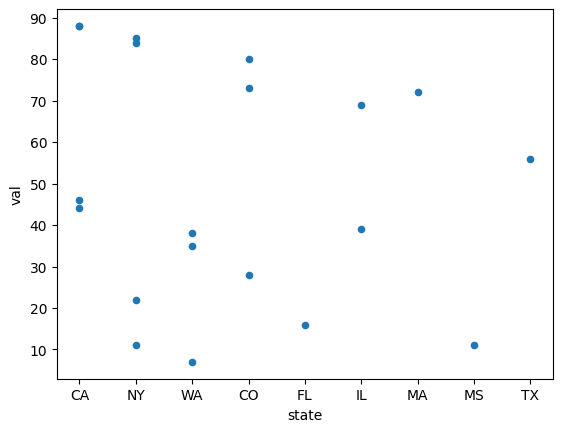

In [51]:
# Scatter plot
df2.plot.scatter(x='state', y='val')

<Axes: ylabel='Frequency'>

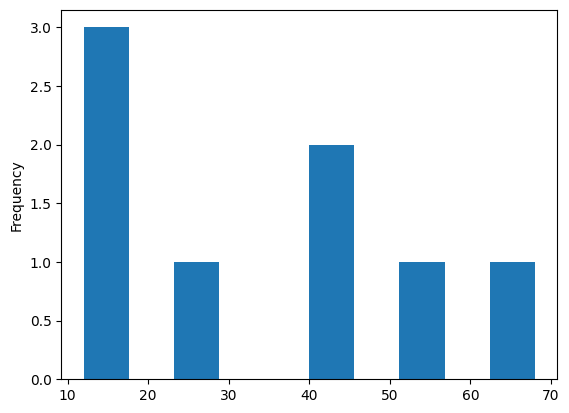

In [52]:
# Histogram
df.vol.plot.hist()

## Loading Data

### CSV - read_csv

In [118]:
# Data source: U.S. Energy Information Administration
# via data.gov
# https://www.eia.gov/electricity/data/browser/#/topic/0?agg=2,0,1&fuel=vvg&geo=g&sec=g&linechart=ELEC.GEN.ALL-US-99.M~ELEC.GEN.COW-US-99.M~ELEC.GEN.NG-US-99.M~ELEC.GEN.NUC-US-99.M~ELEC.GEN.HYC-US-99.M&columnchart=ELEC.GEN.ALL-US-99.M~ELEC.GEN.COW-US-99.M~ELEC.GEN.NG-US-99.M~ELEC.GEN.NUC-US-99.M~ELEC.GEN.HYC-US-99.M&map=ELEC.GEN.ALL-US-99.M&freq=M&start=2001&end=2022&ctype=linechart&ltype=pin&rtype=s&pin=&rse=0&maptype=0
energy_df = pd.read_csv("Net_generation_United_States_all_sectors_monthly.csv")
energy_df

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours
0,Feb 2023,310200.68838,46315.31790,124428.39313,60806.857,19338.35544
1,Jan 2023,347437.12445,60121.33153,137731.30470,70870.080,22954.32437
2,Dec 2022,363624.58257,73164.12069,141137.63611,69094.147,21870.06448
3,Nov 2022,322958.83812,56169.75355,126944.16353,62041.287,18764.33935
4,Oct 2022,314110.95176,54071.14987,133024.80631,58945.383,14638.18031
...,...,...,...,...,...,...
261,May 2001,300491.62100,151592.91400,50934.20500,61512.445,19175.63500
262,Apr 2001,278078.87100,140670.65400,45842.74600,56003.026,18012.99400
263,Mar 2001,300706.54400,155269.01100,44364.41400,62140.712,20477.18900
264,Feb 2001,282940.19800,149735.48400,37966.92700,61272.407,17472.88900


In [120]:
import re

# Rename all columns to be shorter and a little easier to reference.
def tidy_column(col):
    col = re.sub(r"( \((\w|-)+\))? thousand megawatthours$", "", col)
    col = re.sub(r" ", "_", col)
    return col

energy_df.rename(columns=lambda col: tidy_column(col), inplace=True)
energy_df.columns

Index(['Month', 'all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric'],
      dtype='object')

<Axes: xlabel='Month', ylabel='coal'>

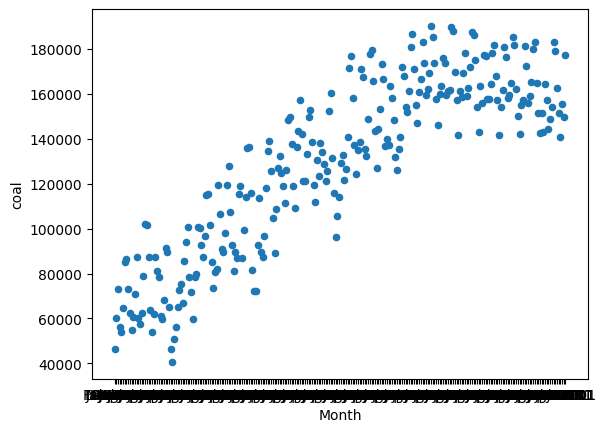

In [121]:
energy_df.plot.scatter(x="Month", y="coal")

<Axes: xlabel='Month', ylabel='nuclear'>

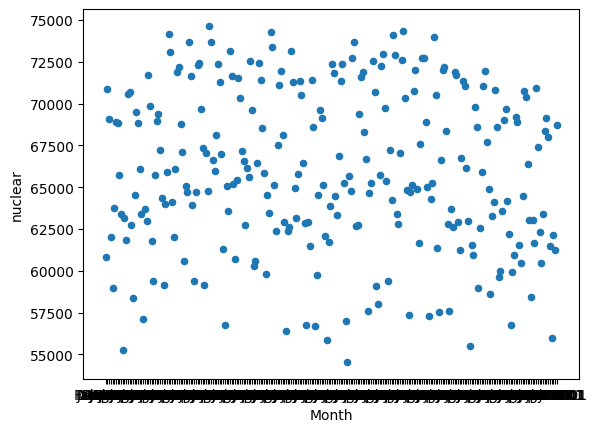

In [122]:
energy_df.plot.scatter(x="Month", y="nuclear")

In [123]:
# energy_df.reset_index(inplace=True)
energy_df["Month"] = pd.to_datetime(energy_df["Month"], format="%b %Y")

In [124]:
energy_df

,Month,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric
0,2023-02-01,310200.68838,46315.31790,124428.39313,60806.857,19338.35544
1,2023-01-01,347437.12445,60121.33153,137731.30470,70870.080,22954.32437
2,2022-12-01,363624.58257,73164.12069,141137.63611,69094.147,21870.06448
3,2022-11-01,322958.83812,56169.75355,126944.16353,62041.287,18764.33935
4,2022-10-01,314110.95176,54071.14987,133024.80631,58945.383,14638.18031
...,...,...,...,...,...,...
261,2001-05-01,300491.62100,151592.91400,50934.20500,61512.445,19175.63500
262,2001-04-01,278078.87100,140670.65400,45842.74600,56003.026,18012.99400
263,2001-03-01,300706.54400,155269.01100,44364.41400,62140.712,20477.18900
264,2001-02-01,282940.19800,149735.48400,37966.92700,61272.407,17472.88900


In [125]:
energy_df.set_index("Month", inplace=True)

In [126]:
# energy_df.set_index("Month")
yearly_energy_df = energy_df.groupby(pd.Grouper(freq="Y"))
yearly_energy_df.sum().head()

,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric
Month,,,,,
2001-12-31,3.736644e+06,1.903956e+06,639129.11900,768826.308,216961.04500
2002-12-31,3.858452e+06,1.933130e+06,691005.74700,780064.087,264328.83100
2003-12-31,3.883185e+06,1.973737e+06,649907.54000,763732.695,275806.32800
2004-12-31,3.970555e+06,1.978301e+06,710100.01655,788528.387,268417.30837
2005-12-31,4.055423e+06,2.012873e+06,760960.25437,781986.365,270321.25495


In [127]:
# Aggregate or resample on a yearly basis to get annual totals.
# The older `how` parameter to .resample is deprecated:
# energy_df.resample("Y", how="sum")
yearly_energy_df = energy_df.resample("Y").sum()
yearly_energy_df.head()

,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric
Month,,,,,
2001-12-31,3.736644e+06,1.903956e+06,639129.11900,768826.308,216961.04500
2002-12-31,3.858452e+06,1.933130e+06,691005.74700,780064.087,264328.83100
2003-12-31,3.883185e+06,1.973737e+06,649907.54000,763732.695,275806.32800
2004-12-31,3.970555e+06,1.978301e+06,710100.01655,788528.387,268417.30837
2005-12-31,4.055423e+06,2.012873e+06,760960.25437,781986.365,270321.25495


<Axes: xlabel='Year'>

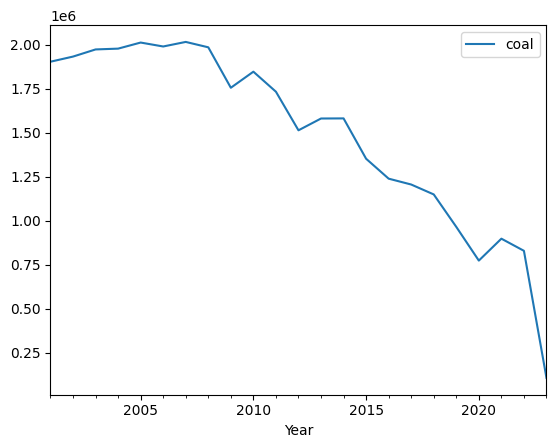

In [128]:
# Reset the index (non-destructive) so that the Month column can be passed to matplotlib as the x parameter.
yearly_energy_df.reset_index().plot.line(x="Month", y="coal", xlabel="Year")

<Axes: xlabel='Year'>

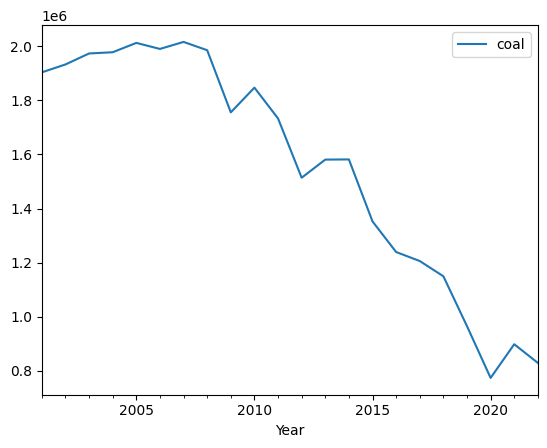

In [129]:
# The last value is for the partial year 2023 (only through
# January), so let's drop the last row in the plot:
yearly_energy_df[:-1].reset_index().plot.line(x="Month", y="coal", xlabel="Year")

<Axes: xlabel='Year'>

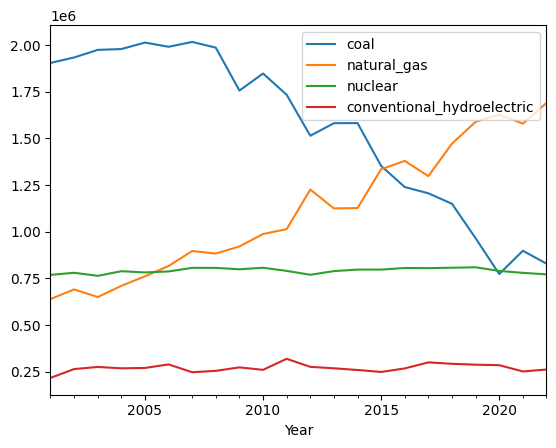

In [131]:
yearly_energy_df.drop(["all_fuels"], axis=1)[:-1].reset_index().plot.line(x="Month", xlabel="Year")

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

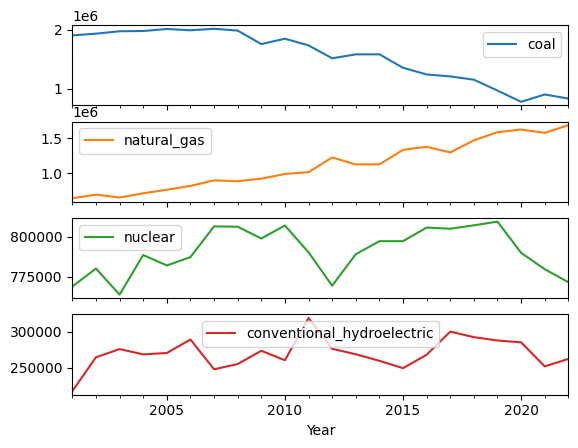

In [132]:
yearly_energy_df.drop(["all_fuels"], axis=1)[:-1].reset_index().plot.line(x="Month", xlabel="Year", subplots=True)